**Multiple Linear Regression**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
"""Returns function f(x) = w1x1 + w2x2 + ... wnxn + b"""
def get_f(weights, bias):
    def f(features):
        sum = 0
        for w, x in zip(weights, features):
            sum += w*x
        return sum+bias
    
    return f

"""Squared Error Cost Function J."""
def cost(f, inp, out):
    assert len(inp) == len(out) != 0

    sum = 0
    n = len(inp)
    for i in range(n):
        sum += (f(inp[i]) - out[i])**2
    return sum/(2*n)

In [3]:
"""Cost History Callback Function"""
Cost_Hist = [[],[]]
def cost_hist(itr, params, inp, out):
    f = get_f(params[:-1], params[-1])
    Cost_Hist[0].append(itr)
    Cost_Hist[1].append(cost(f, inp, out))

"""returns gradient values"""
def gradient(f, inp, out):
    assert len(inp) == len(out) != 0
    
    n = len(inp)
    m = len(inp[0])
    derivative = [0 for i in range(m)]
    for i in range(n):
        diff = f(inp[i])-out[i]
        for j in range(m-1):
            derivative[j] += diff*inp[i][j]
        derivative[m-1] = diff
    
    for j in range(m):
        derivative[j] /= n
    return derivative


"""Gradient Descent Implementation"""
def gradient_descent(a, get_f, inp, out, cost_hist, reltol= 1e-5, maxiter=10000):
    assert len(inp) == len(out) != 0

    n = len(inp)
    m = len(inp[0])
    params = [1 for i in range(m)]
    for i in range(maxiter):
        f = get_f(params[:-1], params[-1])
        derivatives = gradient(f, inp, out)

        for j in range(m):
            params[j] -= a*derivatives[j]

        if (i % (maxiter / 100) == 0):
            cost_hist(i, params, inp, out)
        
    return params

In [4]:
dataset = pd.read_csv("./Datasets/possum.csv").dropna().reset_index()

out = [float(i) for i in dataset["age"]]
dataset = dataset.drop(columns=["index", "sex", "age", "case", "site", "Pop"])

inp = []
for i in range(len(dataset)):
    tmp = []
    for j in dataset:
        tmp.append(float(dataset[j][i]))
    inp.append(tmp)

In [5]:
Cost_Hist = [[],[]]
params = gradient_descent(0.000001, get_f, inp, out, cost_hist, maxiter=10000)
f = get_f(params[:-1], params[-1])
print(cost(f, inp, out))


2.6565340938350026


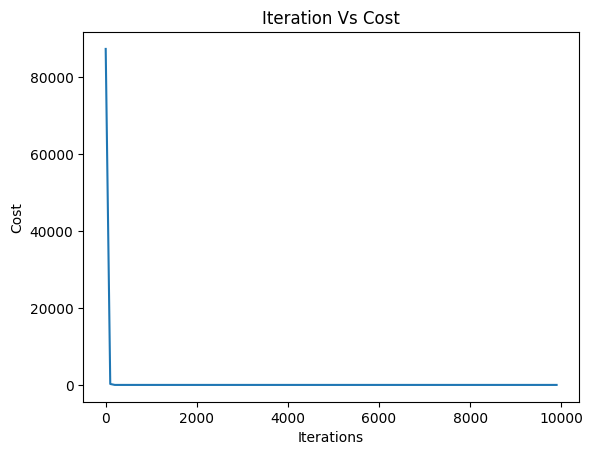

In [6]:
plt.plot(Cost_Hist[0], Cost_Hist[1])
plt.title("Iteration Vs Cost")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()